In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
import math
import os

In [68]:
def getrawintensity(directory,positions,genename):  #directory specifiy genotype,  genename 3: Bcd  4: Hb
    
    os.chdir("/Users/pingwu/Desktop/Toettcher-lab/opto-bicoid/IF//Users/pingwu/Desktop/Toettcher-lab/opto-bicoid/IF/bcd hb/%s",%(directory))

    total_x=[]
    total_y=[]
    for p in positions:
        file.open
        df=pd.read_csv('%s.csv'%str(p), sep=',',header=0,encoding="utf8")
        x = df.values[:,0]
        y = df.values[:,1]
        x_norm = (x/x[-1])*100 # normalize to EL %
        y_filtered=signal.savgol_filter(y, 101, 3) # filter out signal noise by Savitzky–Golay filter
    
        total_x.extend(x_norm)
        total_y.extend(y_filtered)
        plt.plot(x_norm,y_filtered)
        plt.show
    
    bins = np.linspace(0, 100, 100)
    x_digitized = np.digitize(total_x, bins)
    total_y=np.asarray(total_y)
    means = [total_y[x_digitized == i].mean() for i in range(1, len(bins)+1)]
    std = [total_y[x_digitized == i].std() for i in range(1, len(bins)+1)]
    sem = np.divide(std,math.sqrt(len(positions)))
    plt.errorbar(bins,means,yerr=sem,linestyle='dashed',color='black',linewidth=4,elinewidth=0.5)
    plt.ylim((y1,y2))
    plt.xlabel("Egg lengh %")
    plt.ylabel("Intensity")
    np.savetxt('mean-%s.csv'%(genename),(means,sem),delimiter =", ")
    
    #plt.title("Raw %s Intensity of iRFP-uBcd(dark)" %genename)


[None, None]

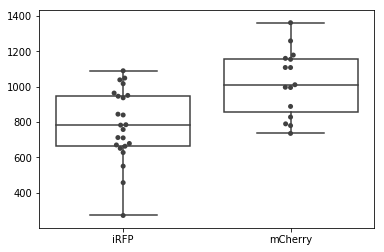

In [6]:
gfp =pd.read_csv('gfp.csv',encoding="utf8")
ax = sns.boxplot(data=gfp)
ax = sns.swarmplot(data=gfp, color=".25")

plt.setp(ax.artists,fill=False)



In [7]:
directory = 'iRFP-Bcd-LEXY, E1/HisGFP'

df=pd.read_csv('%s.csv'%str(1), sep=',',header=0,encoding="utf8")

FileNotFoundError: [Errno 2] No such file or directory: '1.csv'

In [3]:
# min-max normalzied intensity to WT
def getnormintensity(condition,wavelength,genename,positions):
    os.chdir("/Users/pingwu/Desktop/Toettcher-lab/opto-bicoid/IF/nostub bnt summary/mcherry-ubcd")
    
    wt =pd.read_csv('mean(%swt)-%s.csv'%(condition,genename), sep=',',header=None, index_col=False,encoding="utf8")
    meanwt = wt.values[0,:]
    meanwt.sort()
    wtmin = np.mean(meanwt[0:3])
    wtmax = np.mean(meanwt[97:100])
    os.chdir("/Users/pingwu/Desktop/Toettcher-lab/opto-bicoid/IF/201107 Bcd(488) Caudal(546) Eve(594) kni(640)/mcherry bcd bnt blue/EXP")
    
    total_x=[]
    total_y=[]
    for p in positions:
        df=pd.read_csv('Values-%s-%s.csv'%(p,wavelength), sep=',',header=0,encoding="utf8")
        x = df.values[:,0]
        y = df.values[:,1]
        x_norm = (x/x[-1])*100 # normalize to EL %
        y_filtered=signal.savgol_filter(y, 101, 3) # filter out signal noise by Savitzky–Golay filter
        y_norm = (y_filtered-wtmin)/(wtmax-wtmin) #normalize by min max of wt
        total_x.extend(x_norm)
        total_y.extend(y_norm)
        plt.plot(x_norm,y_norm)
        plt.show
    
    bins = np.linspace(0, 100, 100)
    x_digitized = np.digitize(total_x, bins)
    total_y=np.asarray(total_y)
    means = [total_y[x_digitized == i].mean() for i in range(1, len(bins)+1)]
    std = [total_y[x_digitized == i].std() for i in range(1, len(bins)+1)]
    sem = np.divide(std,math.sqrt(len(positions)))
    plt.errorbar(bins,means,yerr=sem,linestyle='dashed',color='black',linewidth=4,elinewidth=0.5)
    plt.xlabel("Egg lengh %")
    plt.ylabel("Intensity")

    np.savetxt('normmean-%s.csv'%(genename),(means,sem,std),delimiter =", ")
    


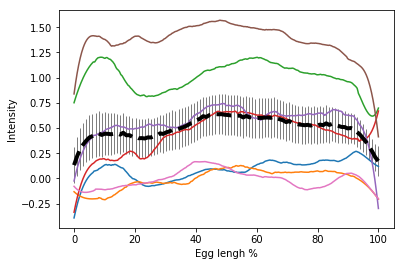

In [7]:
# blue light
positions = ["1","12","14","26","27","31",'32']
getnormintensity('light','640','kni',positions)

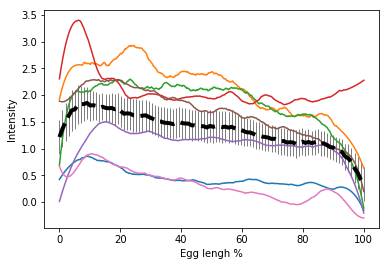

In [9]:
getnormintensity('light','488','bcd',positions)

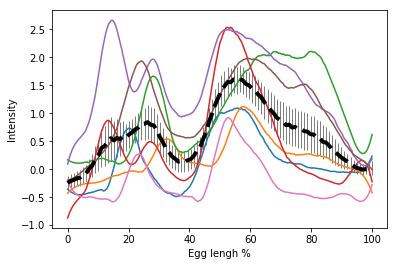

In [10]:
getnormintensity('light','594','eve',positions)

In [5]:
# dark
positions = ["6","19","20","25","29","30",'35','40']
getnormintensity('dark','640','kni',positions)

FileNotFoundError: File b'Values-6-640.csv' does not exist

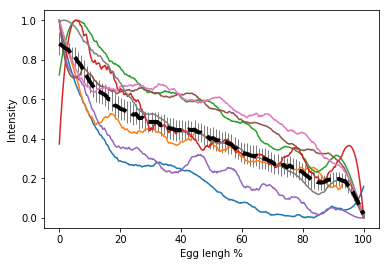

In [129]:
getnormintensity('dark','488','bcd',positions)

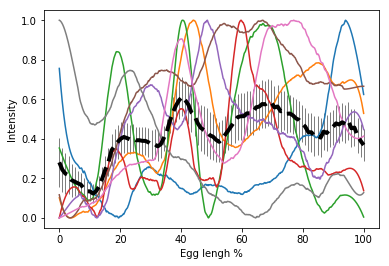

In [130]:
getnormintensity('dark','594','eve',positions)